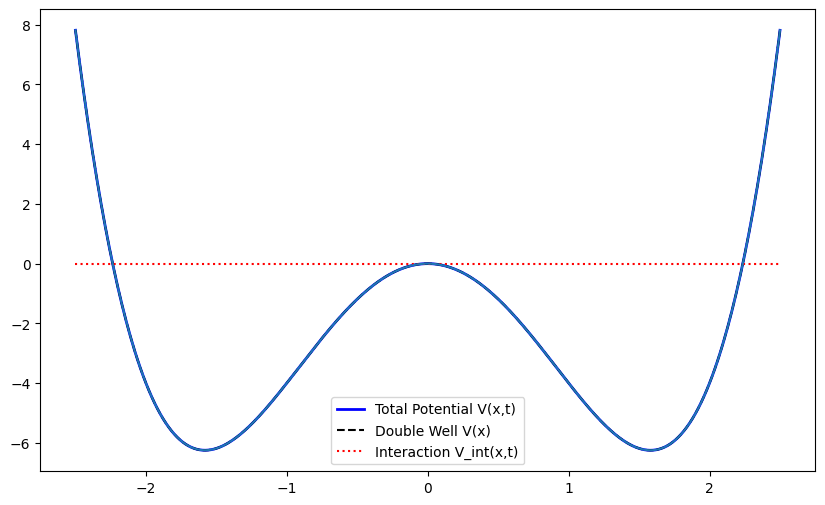

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from potential import double_well_potential, interaction_potential

x = np.linspace(-2.5, 2.5, 500)
v_dw = double_well_potential(x)
v_int_initial = interaction_potential(x, 0)
v_total_initial = v_dw + v_int_initial

plt.plot(x, v_total_initial)
plt.show()

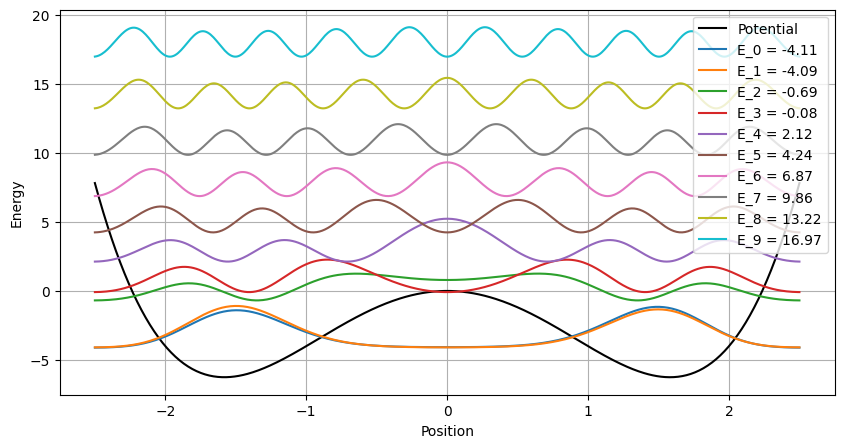

In [6]:
import dolfinx

# Parameters for the simulation
dx = x[1] - x[0]  # Spatial step size
N = len(x)        # Number of spatial points

# Constants (using atomic units)
hbar = 1.0
m = 1.0

# Set up the Hamiltonian matrix
# Kinetic energy operator (second derivative) using finite differences
diag = np.ones(N) * (-2)
off_diag = np.ones(N-1)
D2 = np.diag(diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
K = -0.5 * (hbar**2/m) * D2 / (dx**2)

# Potential energy operator (at t=0)
V = np.diag(v_total_initial)

# Full Hamiltonian
H = K + V

# Solve the eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(H)

# Plot the first few eigenstates
n_states = 10  # Number of states to plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Plot potential
ax.plot(x, v_total_initial, 'k-', label='Potential')
ax.set_xlabel('Position')
ax.set_ylabel('Energy')

# Plot eigenstates
for n in range(n_states):
    # Shift eigenstates vertically to their energy level
    psi = eigenvectors[:, n]
    psi = psi / np.sqrt(np.sum(np.abs(psi)**2) * dx)  # Normalize
    ax.plot(x, 5*np.abs(psi)**2 + eigenvalues[n], 
             label=f'E_{n} = {eigenvalues[n]:.2f}')

ax.legend()
ax.grid(True)
